In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import scipy.stats as st
from seaborn import lmplot

In [2]:
import math
import matplotlib.cm as cm
import pandas as pd
import plotly.express as px
from matplotlib.pyplot import figure


In [3]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from lmfit import minimize, Parameters, Parameter, report_fit

import os

import time

import warnings

warnings.filterwarnings("ignore", category=RuntimeWarning) 

In [4]:
df = pd.read_csv("vejiga.csv") #vejiga

In [5]:
df

,Prioridad,V95%,V45Gy,D35%
0,0,100.0,90.3,5009.8
1,20,100.0,85.6,4984.4
2,40,100.0,77.7,4964.1
3,60,99.9,73.5,4941.7
4,80,99.0,69.3,4889.9
5,100,97.8,66.8,4842.4
6,120,96.7,64.4,4787.1
7,130,96.4,63.4,4767.4
8,140,96.0,61.7,4726.7
9,160,95.9,58.2,4694.9


In [6]:
t = df['Prioridad']
color = []
for i in t:
    color.append(i)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


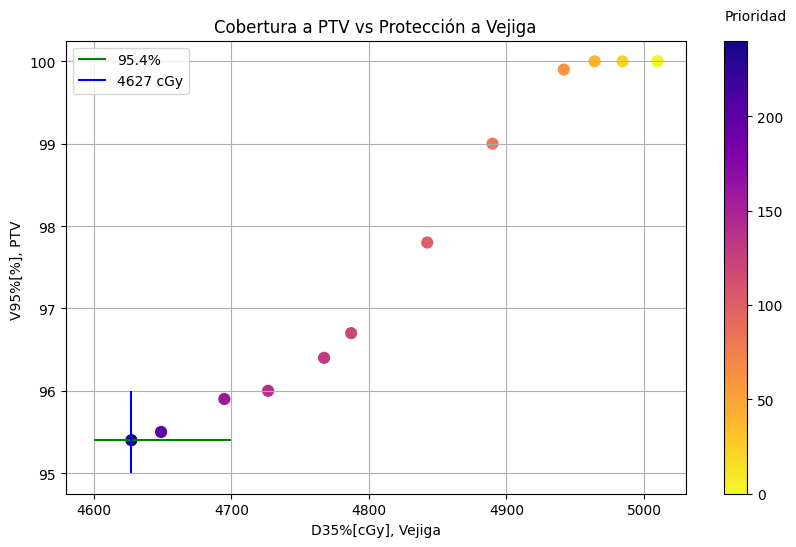

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
figure(figsize=(10, 6), dpi=100)
plt.scatter(df['D35%'], df['V95%'], c=color, cmap='plasma_r', s=60)#, s=np.power((dfR['D35%']/1000),(5*dfR['D35%']/10000)))
clb =  plt.colorbar()
clb.set_label('Prioridad', labelpad=-20, y=1.07, rotation=0)
plt.hlines(y=95.4, xmin=4600, xmax=4700, label='95.4%', colors='green')
plt.vlines(x=4627, ymin=95, ymax=96, label='4627 cGy',colors='blue')
plt.grid()
plt.title("Cobertura a PTV vs Protección a Vejiga")
plt.xlabel("D35%[cGy], Vejiga")
plt.ylabel("V95%[%], PTV ") #volumen del PTV
plt.legend(loc='best')
plt.savefig('ProteccionVejiga.eps', bbox_inches='tight')
plt.savefig('ProteccionVejiga.png', bbox_inches='tight')
plt.show()

In [8]:
#ahora para el recto
dfR = pd.read_csv("recto.csv") #recto

In [9]:
dfR

,Prioridad,V95%,D60%,D35%,D35%Vejiga
0,0,100.0,4962.3,5008.1,5009.8
1,20,100.0,4955.5,5000.7,4984.7
2,40,99.9,4930.6,4984.5,4991.5
3,60,99.2,4870.9,4965.0,4998.5
4,80,98.1,4816.9,4940.5,5009.6
5,100,97.5,4762.8,4896.0,5006.6
6,120,96.8,4695.3,4845.2,5017.3
7,140,95.9,4666.6,4815.1,5023.4
8,180,94.6,4606.1,4735.7,5043.8


In [10]:
t = dfR['Prioridad']
color = []
for i in t:
    color.append(i)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


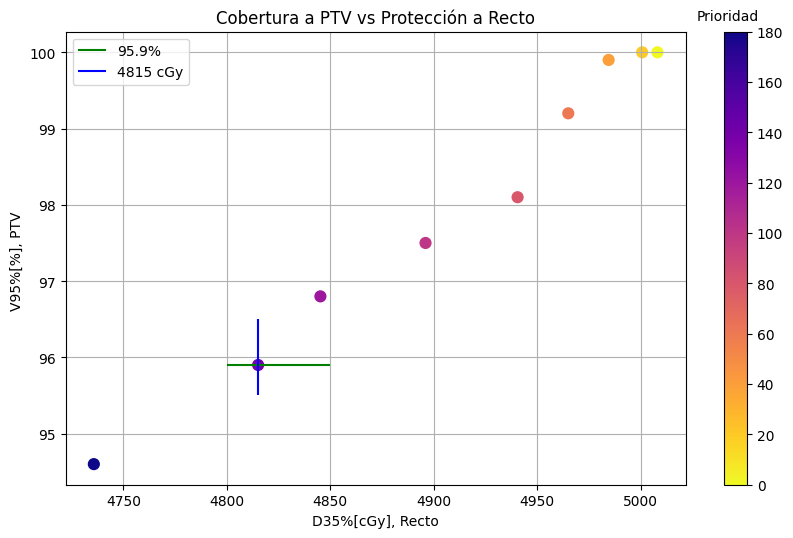

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
figure(figsize=(10, 6), dpi=100)
plt.scatter(dfR['D35%'], dfR['V95%'], c=color, cmap='plasma_r',s=60)#, s=np.abs(10 + 10*(df['Vvej45Gy']-100)))
clb =  plt.colorbar()
clb.set_label('Prioridad', labelpad=-40, y=1.05, rotation=0)
plt.hlines(y=95.9, xmin=4800, xmax=4850, label='95.9%', colors='green')
plt.vlines(x=4815, ymin=95.5, ymax=96.5, label='4815 cGy',colors='blue')
plt.legend(loc='best')
plt.grid()
plt.title("Cobertura a PTV vs Protección a Recto")
plt.xlabel("D35%[cGy], Recto")
plt.ylabel("V95%[%], PTV ") #volumen del PTV
plt.legend(loc='best')
plt.savefig('ProteccionRecto.eps', bbox_inches='tight')
plt.savefig('ProteccionRecto.png', bbox_inches='tight')
plt.show()
plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


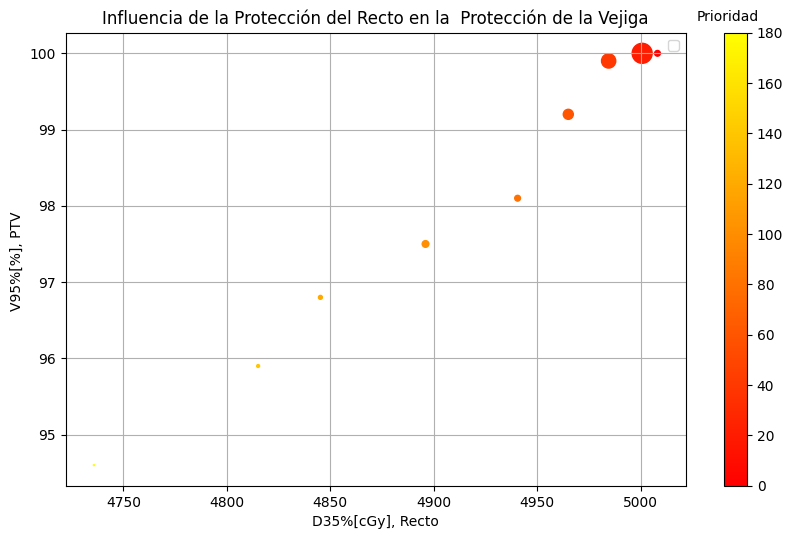

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
figure(figsize=(10, 6), dpi=100)
plt.scatter(dfR['D35%'], dfR['V95%'], c=color, cmap='autumn',s= np.abs((500-dfR['D35%Vejiga'])/10**2)*np.exp((500-dfR['D35%Vejiga']/10)))
clb =  plt.colorbar()
clb.set_label('Prioridad', labelpad=-40, y=1.05, rotation=0)
#plt.hlines(y=95.9, xmin=4800, xmax=4900, label='95.9%', colors='green')
#plt.vlines(x=4815, ymin=95.5, ymax=96.5, label='4815 cGy',colors='blue')
plt.legend(loc='best')
plt.grid()
plt.title("Influencia de la Protección del Recto en la  Protección de la Vejiga")
plt.xlabel("D35%[cGy], Recto")
plt.ylabel("V95%[%], PTV ") #volumen del PTV
plt.legend(loc='best')
plt.savefig('ProteccionVejiga-Recto.eps', bbox_inches='tight')
plt.savefig('ProteccionVejiga-Recto.png', bbox_inches='tight')
plt.show()
plt.show()

No handles with labels found to put in legend.


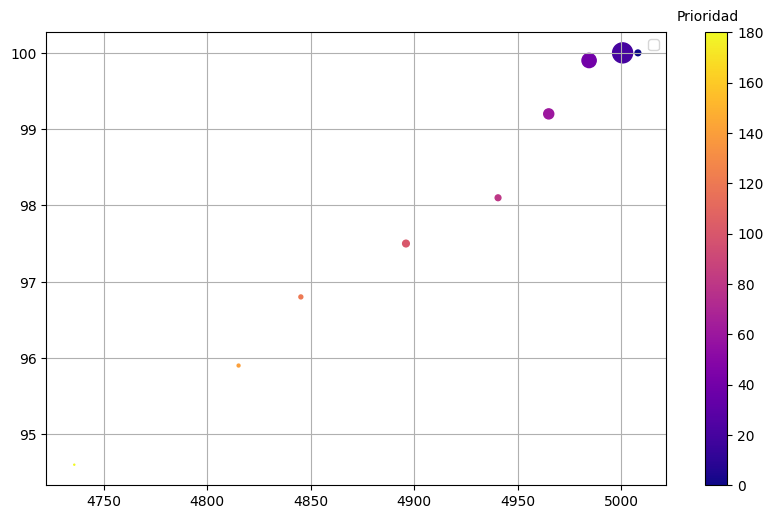

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
figure(figsize=(10, 6), dpi=100)
plt.scatter(dfR['D35%'], dfR['V95%'], c=color, cmap='plasma',s= np.abs((500-dfR['D35%Vejiga'])/10**2)*np.exp((500-dfR['D35%Vejiga']/10)))
clb =  plt.colorbar()
clb.set_label('Prioridad', labelpad=-40, y=1.05, rotation=0)
#plt.hlines(y=95.9, xmin=4800, xmax=4900, label='95.9%', colors='green')
#plt.vlines(x=4815, ymin=95.5, ymax=96.5, label='4815 cGy',colors='blue')
plt.legend(loc='best')
plt.grid()
plt.show()

In [14]:
#en la optimizacion al recto llevar registro de como se va afectando la vejiga para buscar
#un punto optimo

In [15]:
#ahora para el recto
dfF = pd.read_csv("Fem.csv") #recto

In [16]:
dfF

,Prioridad,V95%,D20%,D15%,DOSIS_MEDIA
0,0,100,2666,3144,2081
1,20,100,2498,2801,1874
2,40,100,2264,2483,1530
3,60,100,2194,2420,1469
4,80,100,2187,2411,1469
5,100,100,2155,2370,1456
6,120,100,2104,2320,1458


In [17]:
t = dfF['Prioridad']
color = []
for i in t:
    color.append(i)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


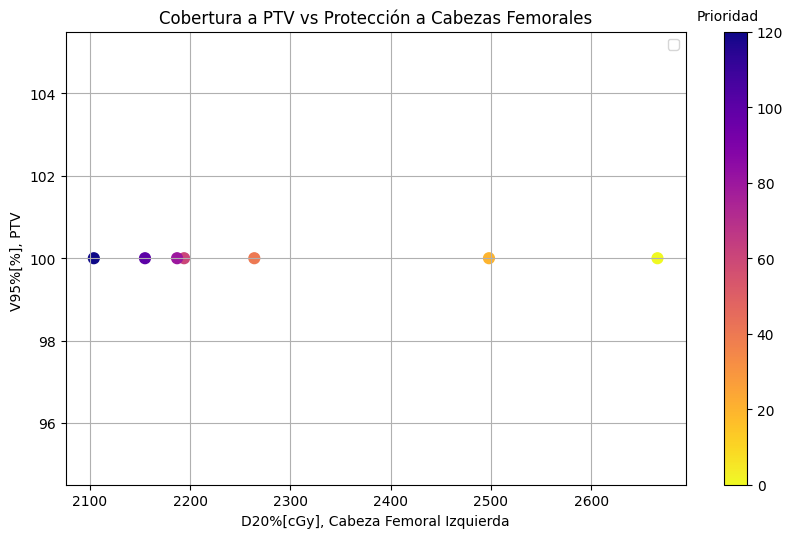

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
figure(figsize=(10, 6), dpi=100)
plt.scatter(dfF['D20%'], dfF['V95%'], c=color, cmap='plasma_r',s=60)#, s=np.abs(10 + 10*(df['Vvej45Gy']-100)))
clb =  plt.colorbar()
clb.set_label('Prioridad', labelpad=-40, y=1.05, rotation=0)
#plt.hlines(y=95.9, xmin=4800, xmax=4900, label='95.9%', colors='green')
#plt.vlines(x=4815, ymin=95.5, ymax=96.5, label='4815 cGy',colors='blue')
plt.legend(loc='best')
plt.grid()
plt.title("Cobertura a PTV vs Protección a Cabezas Femorales")
plt.xlabel("D20%[cGy], Cabeza Femoral Izquierda")
plt.ylabel("V95%[%], PTV ") #volumen del PTV
plt.legend(loc='best')
plt.savefig('ProteccionCabezaFem.eps', bbox_inches='tight')
plt.savefig('ProteccionCabezaFem.png', bbox_inches='tight')
plt.show()
plt.show()

In [19]:
#la protección a las cabezas femorales parece no influir en la conformación del ptv.

In [20]:
#import matplotlib.pyplot as plt
#import pandas as pd
#figure(figsize=(10, 6), dpi=100)
#plt.scatter(dfF['D15%'], dfF['DOSIS_MEDIA'], c=color, cmap='plasma_r',s=60)#, s=np.abs(10 + 10*(df['Vvej45Gy']-100)))
#clb =  plt.colorbar()
#clb.set_label('Prioridad', labelpad=-40, y=1.05, rotation=0)
###plt.hlines(y=95.9, xmin=4800, xmax=4900, label='95.9%', colors='green')
###plt.vlines(x=4815, ymin=95.5, ymax=96.5, label='4815 cGy',colors='blue')
#plt.legend(loc='best')
#plt.grid()
#plt.show()